<a href="https://colab.research.google.com/github/DanielKorenDataScience/RegressionProject/blob/main/Regression%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laptop Prices prediction using Regression ML model**

# **Source link**

https://www.kaggle.com/muhammetvarl/laptop-price

# **Preliminary**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import sys
import os
import re

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.ensemble import RandomForestRegressor

# For the tree visualization
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse

# For validation
from sklearn.model_selection import train_test_split as split

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
data_url = 'https://raw.githubusercontent.com/DanielKorenDataScience/RegressionProject/master/laptop_price.csv'
resp = requests.get(data_url)
text = resp.text

with open('laptop_price.csv', 'w') as fh:
    fh.write(text)
  
df = pd.read_csv('laptop_price.csv')

In [4]:
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859–1')

# **Knowing the data**

In [5]:
df.head(5)

laptop_ID Company      Product  ...  OpSys  Weight Price_euros
0          1   Apple  MacBook Pro  ...  macOS  1.37kg     1339.69
1          2   Apple  Macbook Air  ...  macOS  1.34kg      898.94
2          3      HP       250 G6  ...  No OS  1.86kg      575.00
3          4   Apple  MacBook Pro  ...  macOS  1.83kg     2537.45
4          5   Apple  MacBook Pro  ...  macOS  1.37kg     1803.60

[5 rows x 13 columns]

In [6]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [7]:
df.describe()

laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191  1123.686992
std     381.172104     1.426304   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000

In [8]:
df.T

0     ...                                  1302
laptop_ID                                          1  ...                                  1320
Company                                        Apple  ...                                  Asus
Product                                  MacBook Pro  ...   X553SA-XX031T (N3050/4GB/500GB/W10)
TypeName                                   Ultrabook  ...                              Notebook
Inches                                          13.3  ...                                  15.6
ScreenResolution  IPS Panel Retina Display 2560x1600  ...                              1366x768
Cpu                             Intel Core i5 2.3GHz  ...  Intel Celeron Dual Core N3050 1.6GHz
Ram                                              8GB  ...                                   4GB
Memory                                     128GB SSD  ...                             500GB HDD
Gpu                     Intel Iris Plus Graphics 640  ...                     Intel HD Graphics
OpSys                                          macOS  ...                            Windows 10
Weight                                        1.37kg  ...                                 2.2kg
Price_euros                                  1339.69  ...                                   369

[13 rows x 1303 columns]

In [9]:
df.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [10]:
col = list(df.columns)
for column in col: #.split():
    print(column, ':')
#    df[column] = df[column].str.strip()
    print(df[column].value_counts())
    print()

    """ Product, Screen Resolution, CPU, Weight """

laptop_ID :
1320    1
453     1
435     1
436     1
437     1
       ..
880     1
881     1
882     1
883     1
1       1
Name: laptop_ID, Length: 1303, dtype: int64

Company :
Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
LG             3
Google         3
Chuwi          3
Fujitsu        3
Huawei         2
Name: Company, dtype: int64

Product :
XPS 13                                 30
Inspiron 3567                          29
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
V110-15ISK (i5-6200U/4GB/128GB/W10)     1
Rog GL753VD-GC042T                      1
ThinkPad P70                            1
Tecra X40-D-10Z                         1
Envy 13-AB002nv                         1

# Conclusions:
1. laptop_ID - Unique, not relevant to the model
2. Company - need to split category to columns
3. Product - ???
4. TypeName - need to split category to columns
5. Inches - need to make rounded
6. ScreenResolution - ???
7. Cpu - I think we should smart seperate to manufacturer and have the model in some other way !?
8. Ram - numeric
9. Memory - storage
10. Gpu - category to column !?
11. OpSys - Important -- category to columns 
12. Weight
13. Price_euros - ***Predict***

# **EDA - Data Exploration**

In [11]:
df.head(3)

laptop_ID Company      Product  ...  OpSys  Weight Price_euros
0          1   Apple  MacBook Pro  ...  macOS  1.37kg     1339.69
1          2   Apple  Macbook Air  ...  macOS  1.34kg      898.94
2          3      HP       250 G6  ...  No OS  1.86kg      575.00

[3 rows x 13 columns]

In [12]:
sns.color_palette("coolwarm", as_cmap=True)
sns.set_theme(style="whitegrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


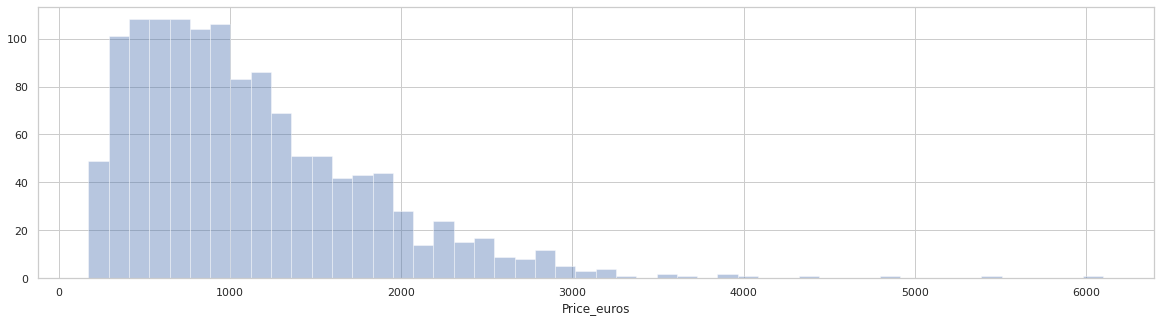

In [13]:
plt.figure(figsize=(20,5))
sns.distplot(df.Price_euros,bins=50, kde=False)

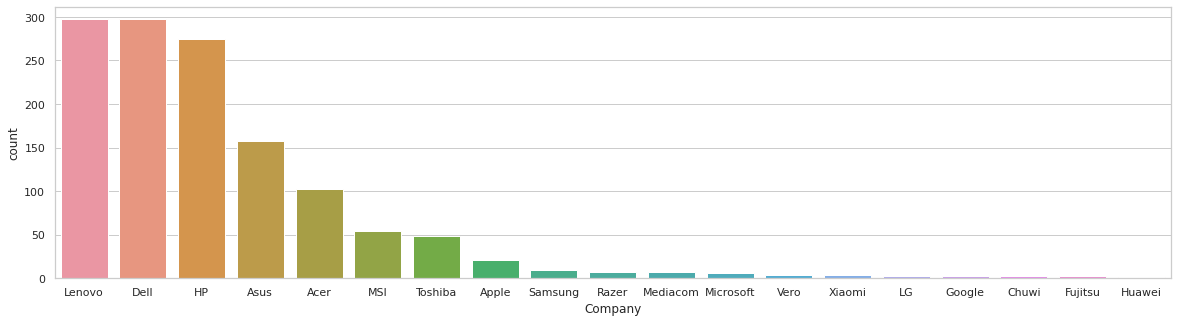

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x=df.Company, order = df['Company'].value_counts().index )

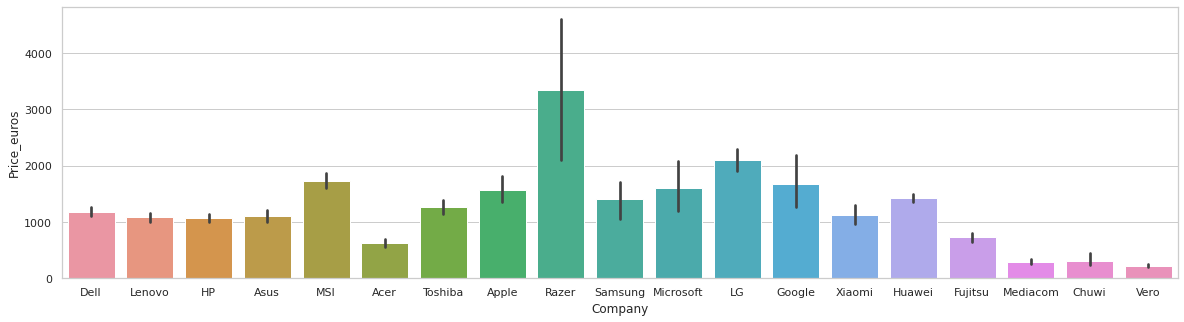

In [15]:
plt.figure(figsize=(20,5))
plot_order = df.groupby('Company')['Price_euros'].sum().sort_values(ascending=False).index.values
sns.barplot(data=df, x=df.Company, y=df.Price_euros, order=plot_order )

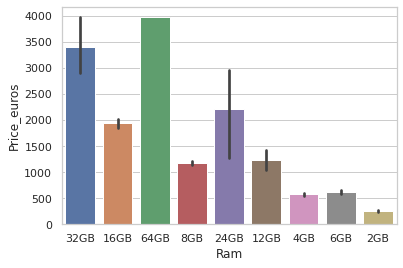

In [16]:
df.sort_values('Price_euros', inplace=True, ascending=False)
sns.barplot(data=df, x=df['Ram'], y=df['Price_euros'])

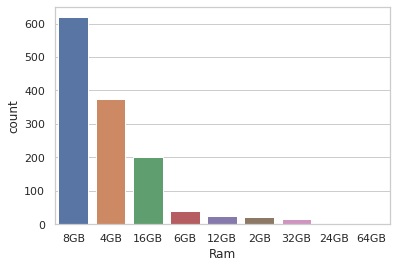

In [17]:
sns.countplot(data=df, x='Ram', order = df['Ram'].value_counts().index)

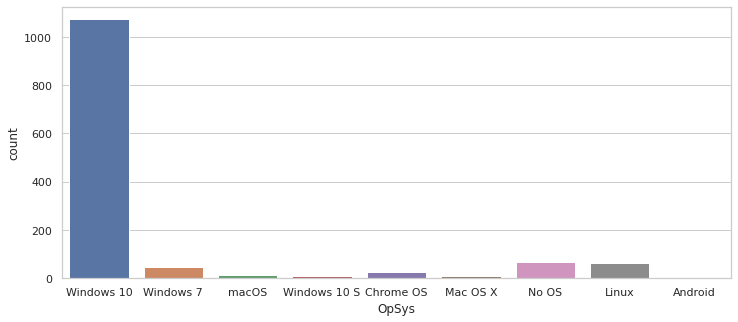

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='OpSys') #, y='Price_euros')

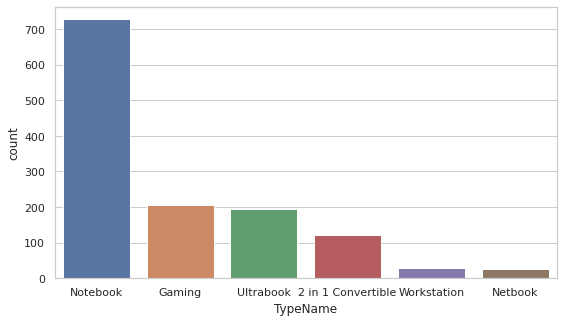

In [19]:
plt.figure(figsize=(9,5))
plot_order = df.groupby('TypeName')['Price_euros'].count().sort_values(ascending=False).index.values
sns.countplot(data=df, x='TypeName', order=plot_order)

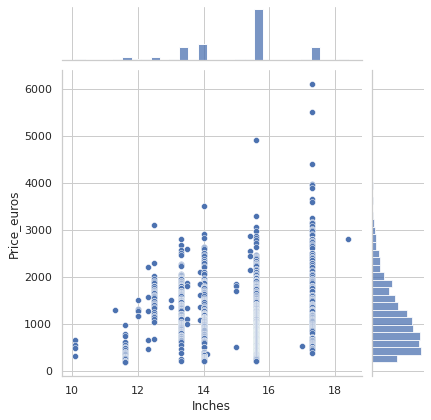

In [20]:
sns.jointplot(x='Inches',y='Price_euros', kind='scatter', data=df)

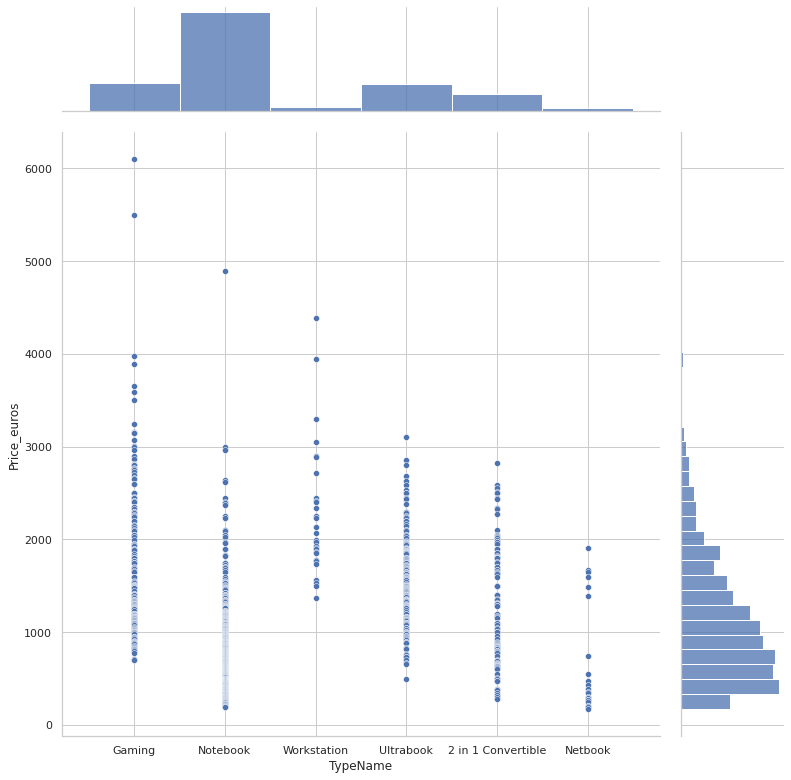

In [21]:
sns.jointplot(x='TypeName', y='Price_euros', kind='scatter', data=df, height=11)

# **Data Cleaning**

In [22]:
df.Price_euros.sort_values().tail(10)

1231    3499.0
780     3588.8
723     3659.4
238     3890.0
1136    3949.4
1066    3975.0
749     4389.0
610     4899.0
830     5499.0
196     6099.0
Name: Price_euros, dtype: float64

In [23]:
#removing noisy values - prices over 3000
#df = df[df['Price_euros'] <= 3000]

# **Data Manipulation**

In [24]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [25]:
df.head(2)

laptop_ID Company    Product  ...       OpSys  Weight Price_euros
196        200   Razer  Blade Pro  ...  Windows 10  3.49kg      6099.0
830        839   Razer  Blade Pro  ...  Windows 10  3.49kg      5499.0

[2 rows x 13 columns]

In [26]:
df_Company = pd.get_dummies(df.Company, prefix='co_')
df_Product = pd.get_dummies(df.Product, prefix='prd_')
df_TypName = pd.get_dummies(df.TypeName, prefix='tpn_')
df_os = pd.get_dummies(df.OpSys, prefix='os_')

In [27]:
# Round inch information 
df.Inches = df.Inches.round()

# Ram to number
df.Ram = df.Ram.str.replace('GB','').astype(int)

# Weight to number
df.Weight = df.Weight.str.replace('kg','').astype(float)

# Memory to number
# memory split
df['Memory_SSD']= np.where(df.Memory.str.find("SSD")==-1,0,1)
df['Memory_Flash_Storage']= np.where(df.Memory.str.find("Flash Storage")==-1,0,1)
df['Memory_HDD']= np.where(df.Memory.str.find("HDD")==-1,0,1)
df['Memory_Hybrid']= np.where(df.Memory.str.find("Hybrid")==-1,0,1)
df['Storage_amt'] = df.Memory.str.split().str[0]
storage_map = {'1.0TB':'1000', '1TB':'1000', '2TB':'2000', '508':'500'}
df.Storage_amt.replace(storage_map , inplace=True)
df.Storage_amt = df.Storage_amt.str.replace('GB','').astype(int)

# Split Cpu information 
df['Cpu_brand'] = df.Cpu.str.split().str[0]
df['Cpu_speed'] = df.Cpu.str.split().str[-1]
df.Cpu_speed = df.Cpu_speed.str.split('GHz').str[0].astype(float)
#df['Cpu_model'] = 
df_Cpu_brand = pd.get_dummies(df.Cpu_brand, prefix='Cpu_')

# CPU
df['Cpu_HighSeries']=np.where((df.Cpu.str.split(" ",1).str[0]=="AMD") | (df.Cpu.str.split(" ",1).str[0]=="Samsung"),df.Cpu.str.split(" ",1).str[1].str.split(" ",1).str[0],
          np.where((df.Cpu.str.split(" ",1).str[0]=="Intel") & (df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0].isin(['Xeon','Atom'])),df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0],
          np.where(df.Cpu.str.split(" ",1).str[0]=="Intel",df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0]+df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[1],     
          "missing")))
df_Cpu_HighSeries = pd.get_dummies(df.Cpu_HighSeries, prefix='CpuH_')

test1=df.Cpu.str.split().str[-2].str.split("-").str[-1]
test2=test1.apply(lambda x:re.findall(r'\d+|$',x)[0])
test2.replace([""],["0"],inplace=True)
test2=test2.astype(int)
df['Cpu_LowSeries']=np.where(test2<10,0,test2)

# Split Gpu information
df['Gpu_brand'] = df.Gpu.str.split().str[0]
df_Gpu_brand = pd.get_dummies(df.Gpu_brand, prefix='Gpu_')
df['Gpu_SubType']=np.where(df.Gpu.str.split(" ",2).str[1].isin(['Graphics','R17M-M1-70','Mali','R4']),'missing',df.Gpu.str.split(" ",2).str[1])
df_Gpu_SubType = pd.get_dummies(df.Gpu_SubType, prefix='GpuST_')

# Handle ScreenResolution information
df['Scr_to'] = df.ScreenResolution.str.split('x').str[-1]
df['Scr_from'] = df.ScreenResolution.str.split('x').str[0]
df['Scr_from'] = df.Scr_from.str.split().str[-1]
df['Scr_Touchscreen']=np.where(df.ScreenResolution.str.find("Touchscreen")>-1,1,0)
df['Scr_HD']=np.where(df.ScreenResolution.str.find("Full HD")>-1,'Full_HD',
                    np.where(df.ScreenResolution.str.find("Quad HD")>-1,'Quad_HD',
                    np.where(df.ScreenResolution.str.find("Ultra HD")>-1,'Ultra_HD',
                             'missing')))
df_Scr_HD = pd.get_dummies(df.Scr_HD, prefix='ScrHD_')

#Categorial change

In [28]:
def GroupPrice(GroupValue,dfOrg):
  df=dfOrg.groupby(GroupValue).agg({'Price_euros':[('avgPrice','mean'),('stdPrice',np.std)],'laptop_ID':[('countLaptop','count')]}).reset_index()
  df.columns=df.columns.droplevel(0)
  df.columns.values[0]=GroupValue
  df.sort_values('countLaptop',ascending=False,inplace=True)
  valueByPrice=df.sort_values('avgPrice',ascending=False)[GroupValue].tolist()
  print(valueByPrice)
  dict_map = dict(zip(valueByPrice, range(len(valueByPrice))))
  dfOrg.loc[:, GroupValue+'Num'] = dfOrg[GroupValue].map(dict_map)
  return dfOrg

In [29]:
df=GroupPrice('Company',df)
display(df[['Company','CompanyNum']].head(10))

['Razer', 'LG', 'MSI', 'Google', 'Microsoft', 'Apple', 'Huawei', 'Samsung', 'Toshiba', 'Dell', 'Xiaomi', 'Asus', 'Lenovo', 'HP', 'Fujitsu', 'Acer', 'Chuwi', 'Mediacom', 'Vero']


Company  CompanyNum
196    Razer           0
830    Razer           0
610   Lenovo          12
749       HP          13
1066    Asus          11
1136      HP          13
238     Asus          11
723     Dell           9
780     Dell           9
1231   Razer           0

In [30]:
types=GroupPrice('TypeName',df)
display(types[['TypeName','TypeNameNum']].head(10))

['Workstation', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Notebook', 'Netbook']


TypeName  TypeNameNum
196        Gaming            1
830        Gaming            1
610      Notebook            4
749   Workstation            0
1066       Gaming            1
1136  Workstation            0
238        Gaming            1
723        Gaming            1
780        Gaming            1
1231       Gaming            1

In [31]:
df=GroupPrice('Scr_HD',df)
display(df[['Scr_HD','Scr_HDNum']].head(10))

['Ultra_HD', 'Quad_HD', 'Full_HD', 'missing']


Scr_HD  Scr_HDNum
196   Ultra_HD          0
830   Ultra_HD          0
610   Ultra_HD          0
749    Full_HD          2
1066   Full_HD          2
1136   Full_HD          2
238    Full_HD          2
723   Ultra_HD          0
780    Full_HD          2
1231   Full_HD          2

In [32]:
df=GroupPrice('Cpu_HighSeries',df)
display(df[['Cpu_HighSeries','Cpu_HighSeriesNum']].head(10))

['Xeon', 'Ryzen', 'Corei7', 'CoreM', 'Corei5', 'FX', 'Cortex', 'A12-Series', 'A10-Series', 'PentiumDual', 'Corei3', 'A9-Series', 'A8-Series', 'PentiumQuad', 'A6-Series', 'CeleronQuad', 'A4-Series', 'Atom', 'CeleronDual', 'E-Series']


Cpu_HighSeries  Cpu_HighSeriesNum
196          Corei7                  2
830          Corei7                  2
610            Xeon                  0
749            Xeon                  0
1066         Corei7                  2
1136         Corei7                  2
238          Corei7                  2
723          Corei7                  2
780          Corei7                  2
1231         Corei7                  2

In [33]:
df=GroupPrice('Gpu_brand',df)
display(df[['Gpu_brand','Gpu_brandNum']].head(10))

['Nvidia', 'Intel', 'AMD', 'ARM']


Gpu_brand  Gpu_brandNum
196     Nvidia             0
830     Nvidia             0
610     Nvidia             0
749     Nvidia             0
1066    Nvidia             0
1136    Nvidia             0
238     Nvidia             0
723     Nvidia             0
780     Nvidia             0
1231    Nvidia             0

In [34]:
df=GroupPrice('Gpu_SubType',df)
display(df[['Gpu_SubType','Gpu_SubTypeNum']].head(10))

['GTX', 'Quadro', 'Iris', 'FirePro', 'GeForce', 'UHD', 'HD', 'Radeon', 'missing']


Gpu_SubType  Gpu_SubTypeNum
196      GeForce               4
830      GeForce               4
610       Quadro               1
749       Quadro               1
1066     GeForce               4
1136      Quadro               1
238      GeForce               4
723      GeForce               4
780      GeForce               4
1231     GeForce               4

In [35]:
df=GroupPrice('OpSys',df)
display(df[['OpSys','OpSysNum']].head(10))

['macOS', 'Windows 7', 'Windows 10 S', 'Mac OS X', 'Windows 10', 'Linux', 'No OS', 'Chrome OS', 'Android']


OpSys  OpSysNum
196   Windows 10         4
830   Windows 10         4
610   Windows 10         4
749    Windows 7         1
1066  Windows 10         4
1136   Windows 7         1
238   Windows 10         4
723   Windows 10         4
780   Windows 10         4
1231  Windows 10         4

In [36]:
df.head(2)

laptop_ID Company    Product  ... Gpu_brandNum  Gpu_SubTypeNum OpSysNum
196        200   Razer  Blade Pro  ...            0               4        4
830        839   Razer  Blade Pro  ...            0               4        4

[2 rows x 35 columns]

In [38]:
df_model=df[['Inches', 'Ram', 'Weight',  'Storage_amt', 'Cpu_speed', 'Scr_from', 'Scr_to','Memory_SSD','Memory_Flash_Storage','Memory_HDD','Memory_Hybrid','Cpu_LowSeries',
             'Scr_Touchscreen','CompanyNum','TypeNameNum','Scr_HDNum','Cpu_HighSeriesNum','Gpu_brandNum','Gpu_SubTypeNum','OpSysNum','Price_euros']].copy()

In [39]:
df_model.shape

(1303, 21)

In [40]:
df_model.head(2)

Inches  Ram  Weight  ...  Gpu_SubTypeNum  OpSysNum Price_euros
196    17.0   32    3.49  ...               4         4      6099.0
830    17.0   32    3.49  ...               4         4      5499.0

[2 rows x 21 columns]

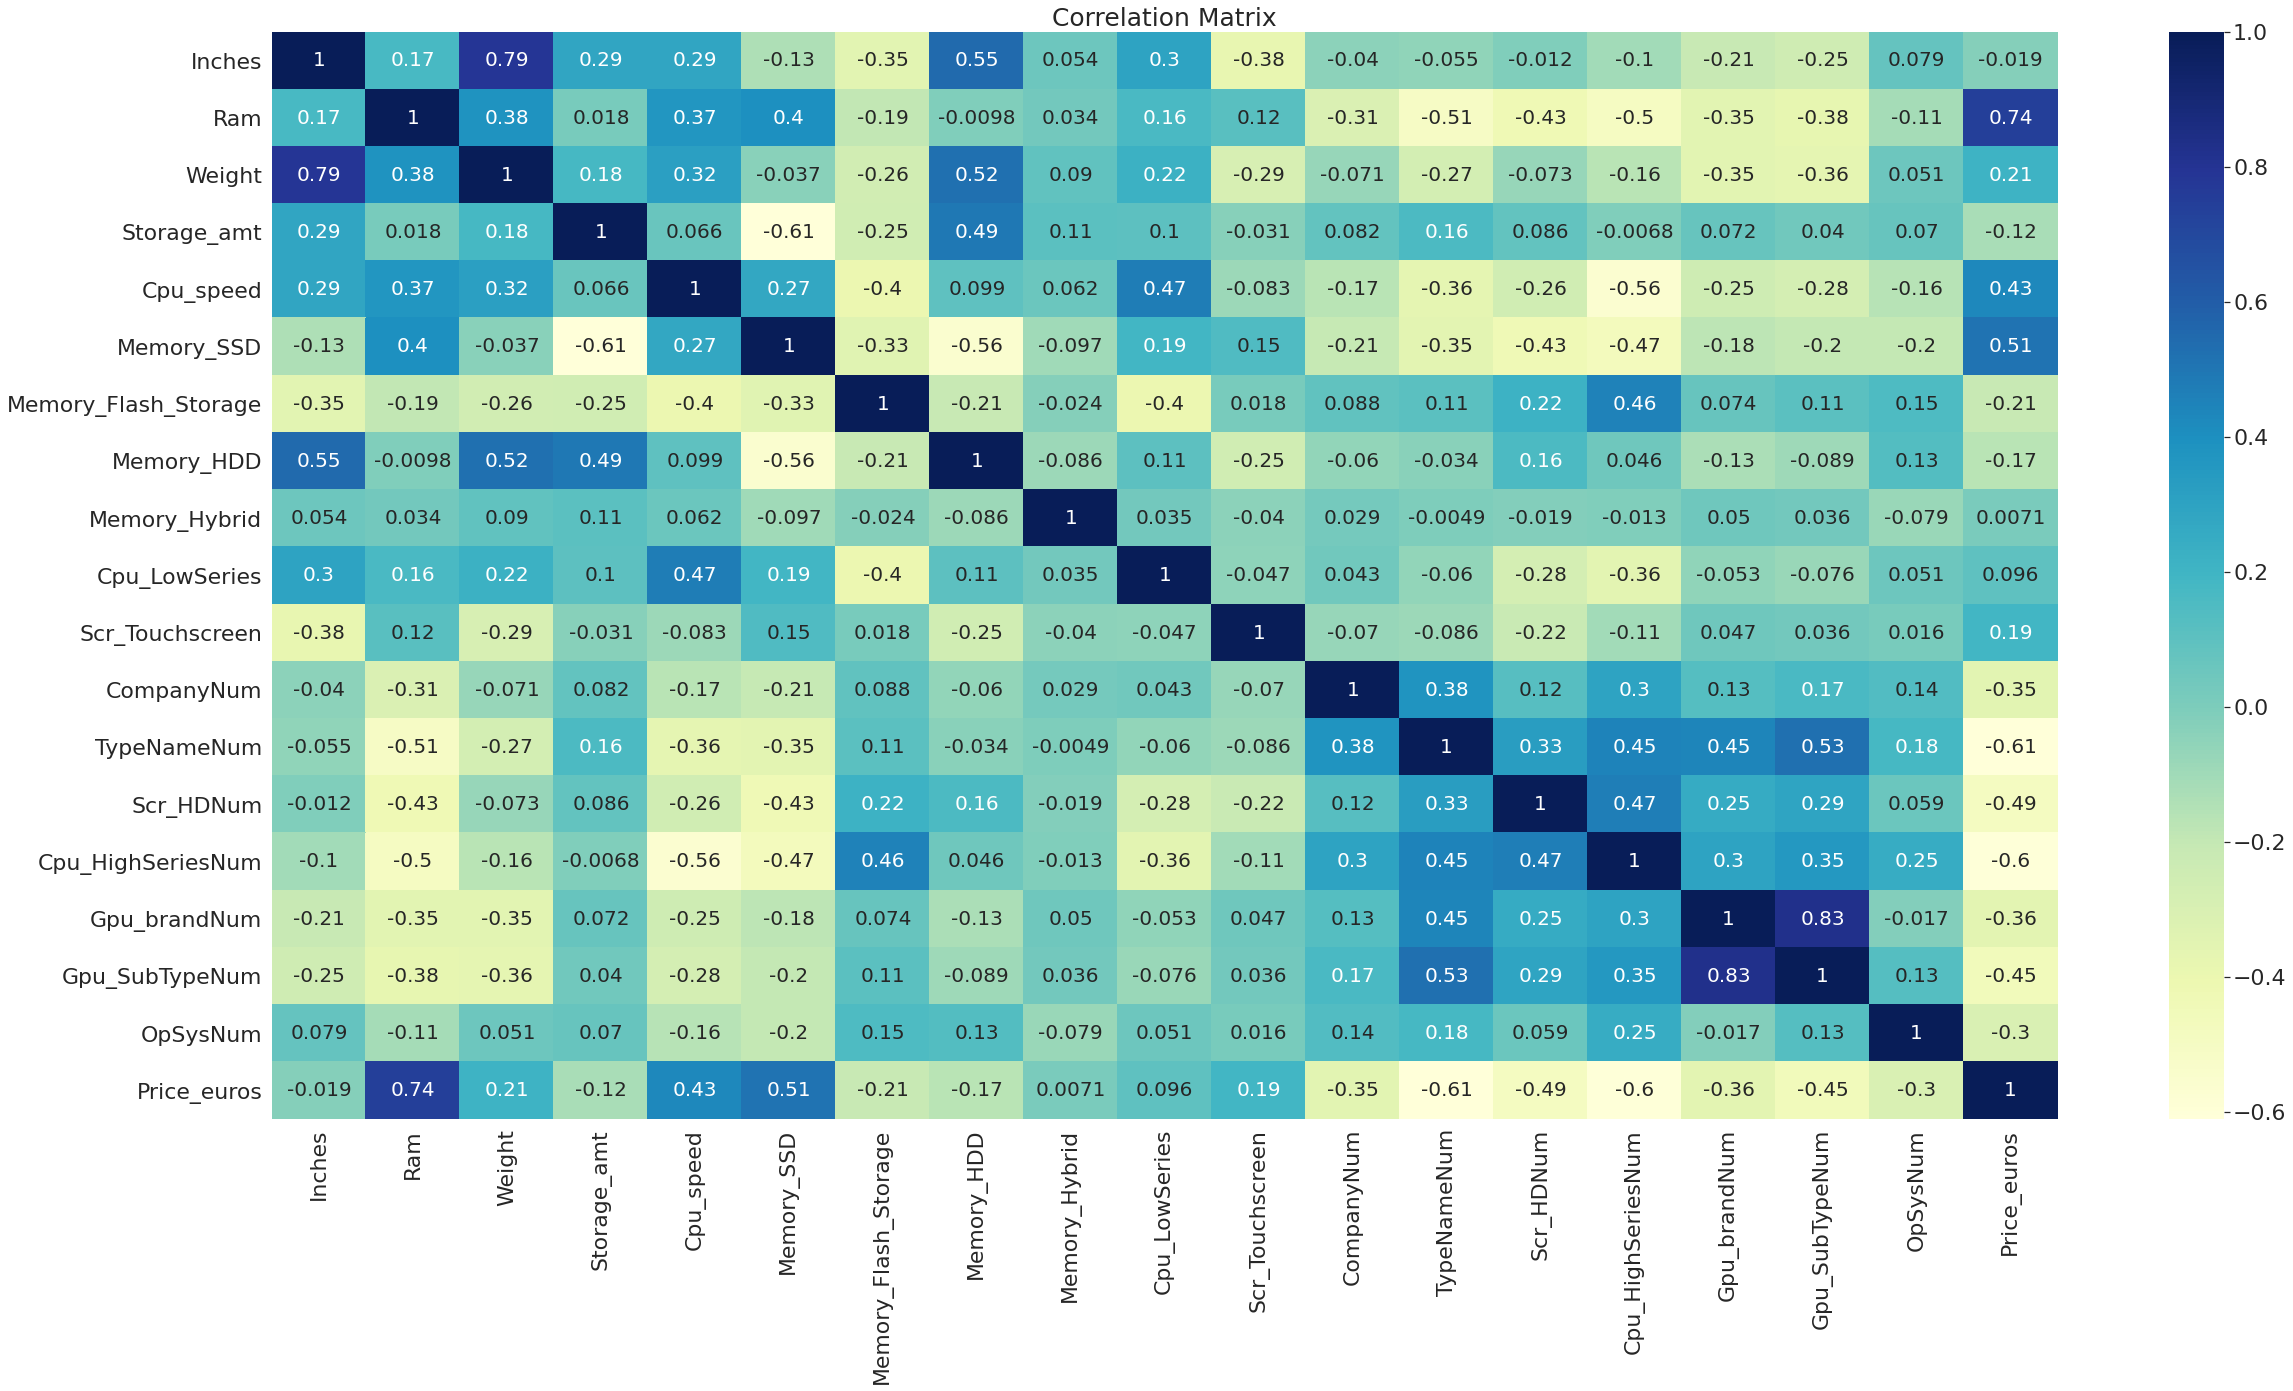

In [69]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(40,20))        
# Imbalanced DataFrame Correlation
corr = df_model.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':20},annot=True, ax=ax)
sns.set(font_scale=2)
ax.set_title("Correlation Matrix", fontsize=25)
plt.show()

In [70]:
# # Combining the Data
# df_model = pd.merge(df[['Inches', 'Ram', 'Weight', 'Price_euros', 'Storage_amt', 'Cpu_speed', 'Scr_from', 'Scr_to','Memory_SSD','Memory_Flash_Storage','Memory_HDD','Memory_Hybrid','Cpu_LowSeries','Scr_Touchscreen']], df_Company, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Product, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_TypName, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_os, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Cpu_brand, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Gpu_brand, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Cpu_HighSeries, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Gpu_SubType, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Scr_HD, left_index=True, right_index=True)
# #df.drop(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys'], axis=1, inplace=True)

# df_model.head(2)

In [212]:
df_model.shape

(1303, 21)

# **Decision Tree Model**

In [41]:
X = df_model.drop('Price_euros', axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

In [42]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [123]:
#model = RandomForestClassifier()
model = DecisionTreeRegressor(max_depth=9, min_samples_leaf=8,min_samples_split=14).fit(X_train, y_train)

In [124]:
y_train_pred = model.predict(X_train)

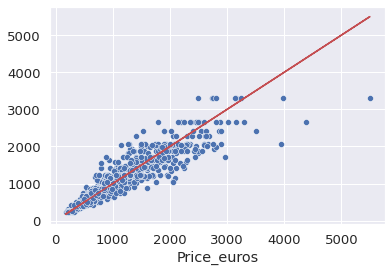

In [125]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [126]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

277.6403750212515

In [127]:
y_test_pred = model.predict(X_test)

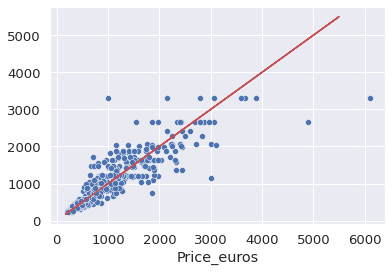

In [128]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [129]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

391.1295499322033

Text(0.5, 11.552000000000007, 'prediction error')

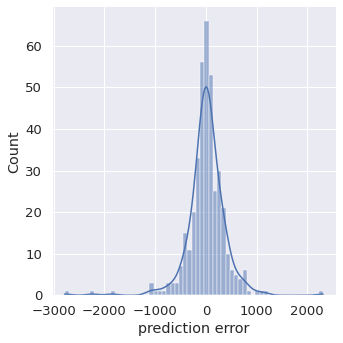

In [133]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [135]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

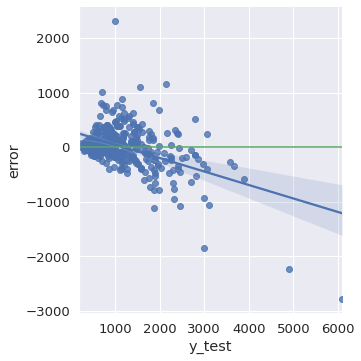

In [137]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'min samples per leaf')

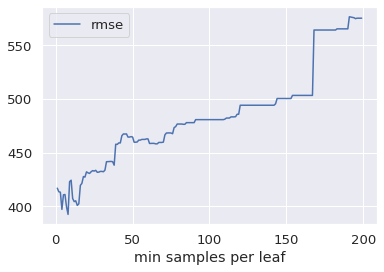

In [101]:
rmse_list = []

min_samples_leaf_range = range(1, 200)

result = pd.DataFrame(index=min_samples_leaf_range, columns =['rmse'])

for i in min_samples_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('min samples per leaf')

In [103]:
result.head(20)

rmse
1   416.827
2   413.502
3   413.064
4    397.09
5   410.677
6   410.935
7   399.465
8   392.391
9   422.884
10  424.257
11  407.188
12  404.317
13  405.094
14  400.788
15  402.265
16  419.405
17  421.326
18  427.644
19  427.167
20  432.042

Text(0.5, 0, 'max depth')

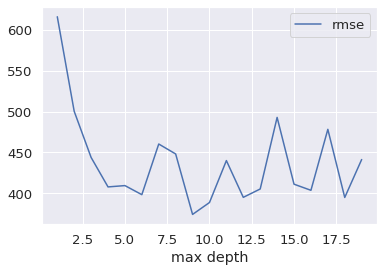

In [104]:
rmse_list = []

max_depth = range(1, 20)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in max_depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('max depth')

In [105]:
result.head(30)

rmse
1    616.22
2   500.363
3   443.904
4   407.825
5   409.438
6    398.34
7   460.352
8   448.183
9   374.144
10  388.704
11  440.058
12   395.05
13  405.294
14  492.942
15  411.161
16  403.671
17  478.335
18  394.904
19  441.347

rmse
1       NaN
2   439.722
3   411.627
4    414.55
5   414.695
6   443.031
7   398.028
8   388.883
9   387.853
10  388.513
11  389.597
12  427.181
13  393.663
14  385.046
15  422.417
16  387.026
17  422.221
18  384.256
19  384.442
20  383.613
21   384.44
22  385.343
23  384.649
24  384.649
25  381.906
26  419.528
27  383.116
28    383.4
29  384.187
30  383.888

Text(0.5, 0, 'min_samples_split')

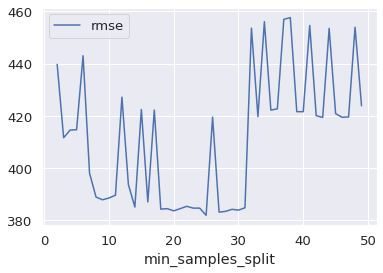

In [130]:
rmse_list = []

min_samples_split = range(2, 50)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in min_samples_split:
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


display(result.head(30))
result.plot()
plt.xlabel('min_samples_split')

In [93]:
def visualize_tree(model, md=5):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=800) 

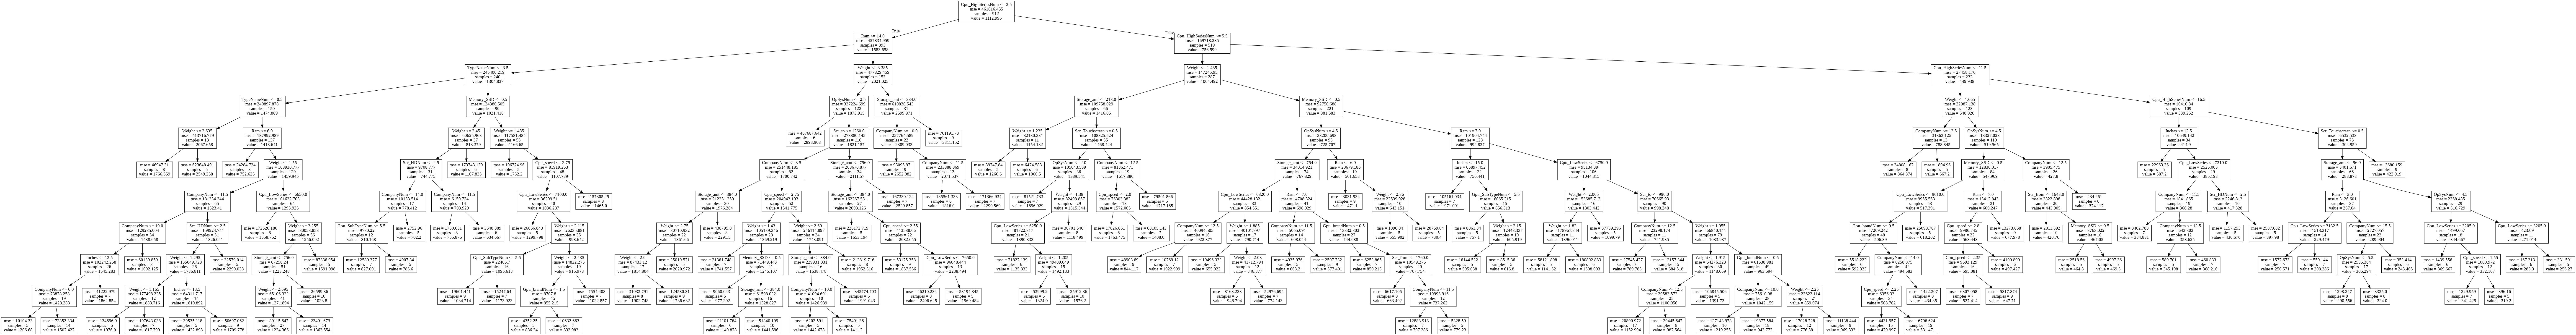

In [94]:
visualize_tree(model, md=100)

In [ ]:
importances[::-1].sort() 

Text(0.5, 0, 'Relative Importance')

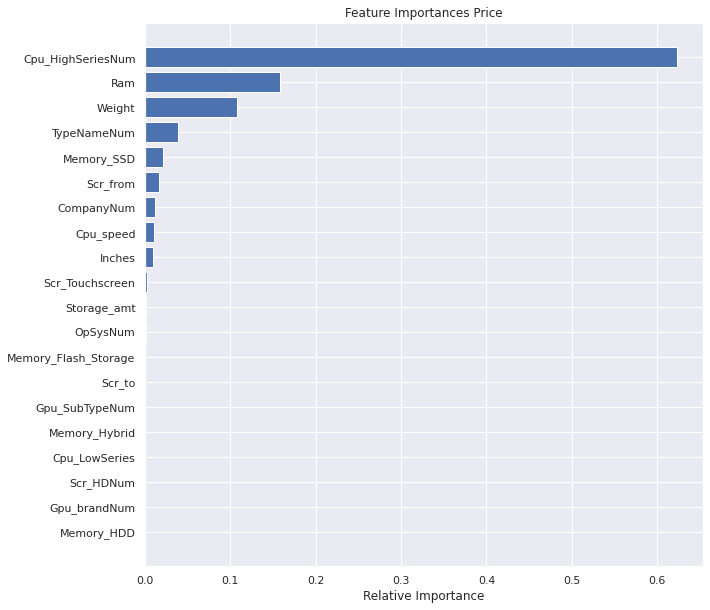

In [83]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# remove cpu_HighSeries

In [139]:
X_train.columns

Index(['Inches', 'Ram', 'Weight', 'Storage_amt', 'Cpu_speed', 'Scr_from',
       'Scr_to', 'Memory_SSD', 'Memory_Flash_Storage', 'Memory_HDD',
       'Memory_Hybrid', 'Cpu_LowSeries', 'Scr_Touchscreen', 'CompanyNum',
       'TypeNameNum', 'Scr_HDNum', 'Cpu_HighSeriesNum', 'Gpu_brandNum',
       'Gpu_SubTypeNum', 'OpSysNum'],
      dtype='object')

In [140]:
X = df_model.drop(['Price_euros','Cpu_HighSeriesNum'], axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

In [141]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [161]:
#model = RandomForestClassifier()
model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=7,min_samples_split=2).fit(X_train, y_train)

In [162]:
y_train_pred = model.predict(X_train)

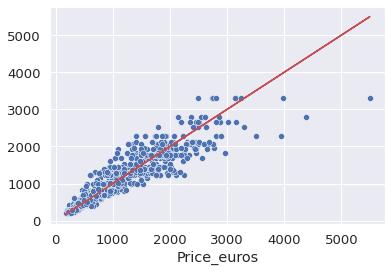

In [163]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [164]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

275.6158151312191

In [165]:
y_test_pred = model.predict(X_test)

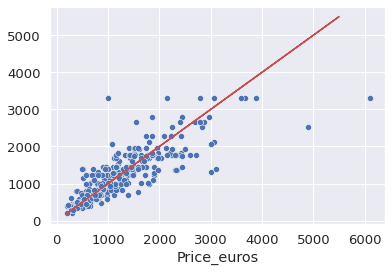

In [166]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [167]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

400.5083968007866

Text(0.5, 11.552000000000007, 'prediction error')

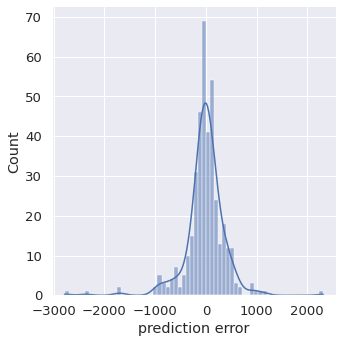

In [168]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [169]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

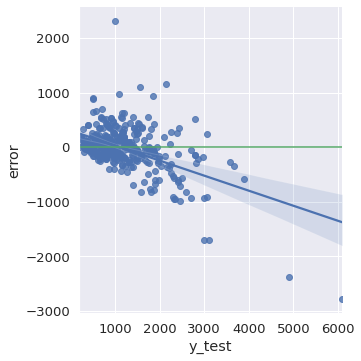

In [170]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'Relative Importance')

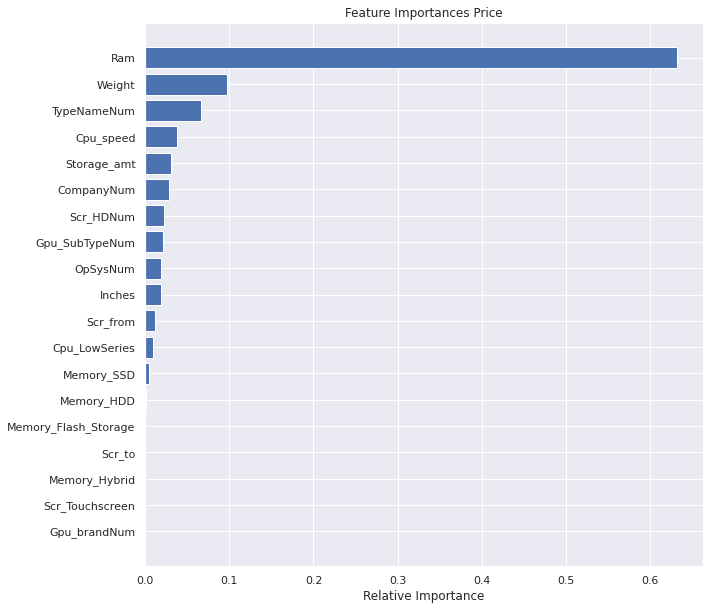

In [171]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'min samples per leaf')

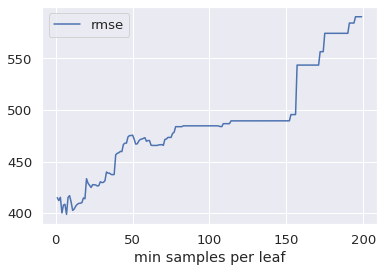

In [142]:
rmse_list = []

min_samples_leaf_range = range(1, 200)

result = pd.DataFrame(index=min_samples_leaf_range, columns =['rmse'])

for i in min_samples_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('min samples per leaf')

In [143]:
result.head(20)

rmse
1   414.981
2   412.159
3   415.348
4   400.205
5   407.824
6   408.566
7   398.765
8   415.235
9   416.922
10  410.738
11  402.591
12  404.028
13  406.806
14  408.564
15  409.442
16  409.642
17  410.097
18   414.72
19  413.936
20  433.377

Text(0.5, 0, 'max depth')

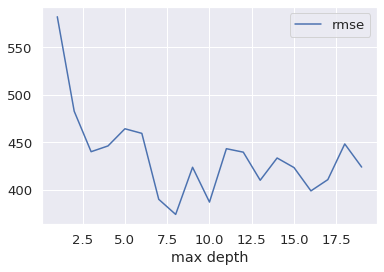

In [144]:
rmse_list = []

max_depth = range(1, 20)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in max_depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('max depth')

In [145]:
result.head(30)

rmse
1   582.325
2   482.632
3   439.942
4   446.041
5   464.142
6   459.298
7   389.706
8   373.781
9   423.522
10  386.789
11  443.112
12  439.455
13  409.834
14  433.312
15  423.195
16   398.61
17   410.49
18  448.134
19  423.747

rmse
1       NaN
2   450.505
3   448.576
4   409.142
5   410.857
6   413.556
7   408.063
8   404.207
9   398.381
10  400.583
11  401.399
12  400.352
13  405.553
14  400.722
15  401.295
16  401.069
17    403.9
18  405.738
19  405.612
20  401.478
21  401.685
22  402.533
23  401.659
24  400.996
25  400.929
26  395.876
27  396.874
28  397.032
29  397.783
30   397.67

Text(0.5, 0, 'min_samples_split')

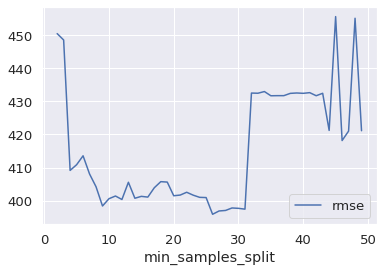

In [146]:
rmse_list = []

min_samples_split = range(2, 50)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in min_samples_split:
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


display(result.head(30))
result.plot()
plt.xlabel('min_samples_split')

# remove all prediction more 3000

In [172]:
df_model_less3000=df_model[df_model['Price_euros']<=3000]

In [173]:
df_model_less3000.shape

(1284, 21)

In [174]:
X = df_model_less3000.drop(['Price_euros'], axis=1)
y = df_model_less3000['Price_euros']
feature_list = list(X.columns)

In [175]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

Text(0.5, 0, 'min samples per leaf')

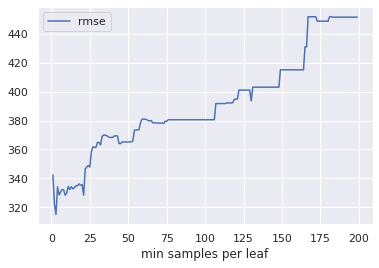

In [176]:
rmse_list = []

min_samples_leaf_range = range(1, 200)

result = pd.DataFrame(index=min_samples_leaf_range, columns =['rmse'])

for i in min_samples_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('min samples per leaf')

In [177]:
result.head(20)

rmse
1   342.472
2   322.203
3   315.119
4   334.198
5   328.556
6   330.732
7   332.422
8   331.966
9   328.355
10   330.01
11  334.521
12  332.313
13  334.281
14  332.777
15  333.685
16  334.905
17  334.971
18  336.165
19  335.357
20  335.643

Text(0.5, 0, 'max depth')

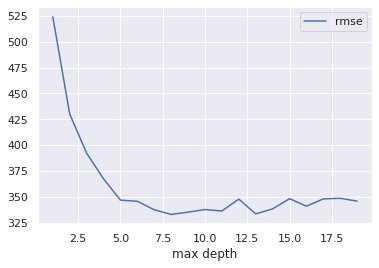

In [181]:
rmse_list = []

max_depth = range(1, 20)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in max_depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('max depth')

In [182]:
result.head(30)

rmse
1   524.283
2   430.104
3   392.237
4   367.397
5   346.722
6   345.687
7   337.402
8   332.916
9   335.107
10  337.649
11  336.229
12  347.706
13  333.467
14  338.296
15  348.118
16  340.875
17  347.965
18  348.535
19  345.786

rmse
1       NaN
2   340.474
3   351.258
4   338.286
5   337.096
6    332.79
7   329.889
8   331.985
9    328.29
10  332.542
11  329.644
12  328.727
13  329.916
14  335.092
15  336.201
16  335.548
17  337.397
18  333.294
19  332.486
20  329.572
21  329.779
22  332.717
23  329.745
24  329.595
25  336.732
26  336.514
27  336.132
28   335.96
29  335.893
30   337.87

Text(0.5, 0, 'min_samples_split')

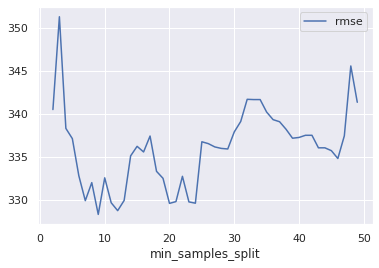

In [183]:
rmse_list = []

min_samples_split = range(2, 50)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in min_samples_split:
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


display(result.head(30))
result.plot()
plt.xlabel('min_samples_split')

In [184]:
#model = RandomForestClassifier()
model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=3,min_samples_split=9).fit(X_train, y_train)

In [185]:
y_train_pred = model.predict(X_train)

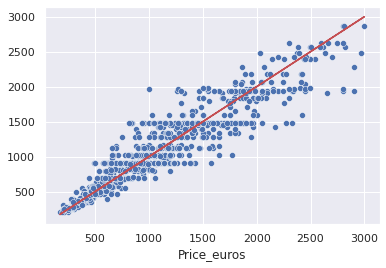

In [186]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [187]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

217.48784192578987

In [188]:
y_test_pred = model.predict(X_test)

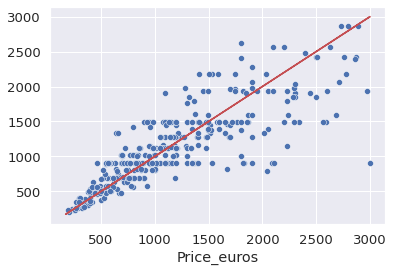

In [189]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [190]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

342.0000442191157

Text(0.5, 11.552000000000007, 'prediction error')

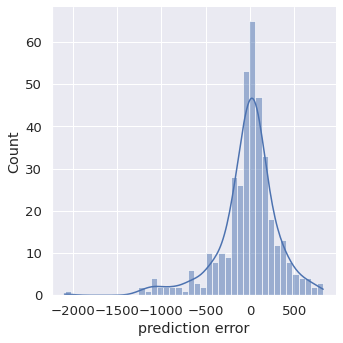

In [191]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [192]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

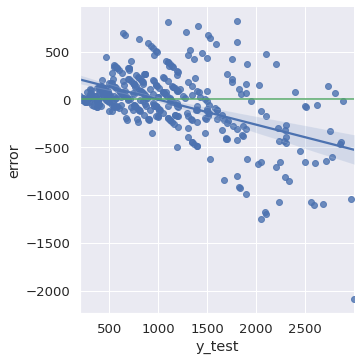

In [193]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'Relative Importance')

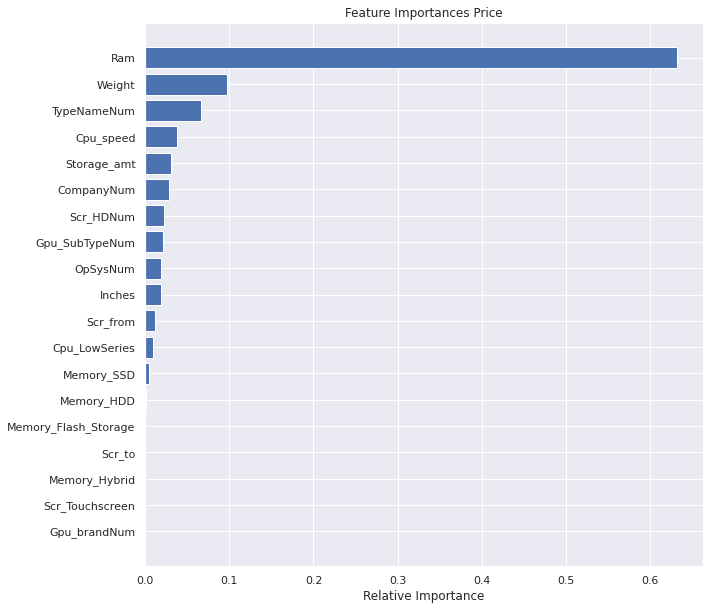

In [ ]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Random Forest Model

In [194]:
X = df_model_less3000.drop('Price_euros', axis=1)
y = df_model_less3000['Price_euros']
feature_list = list(X.columns)

In [195]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [ ]:
# Baseline
# The baseline predictions are the historical averages
#baseline_preds = X_test[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - y_test)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [196]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [200]:
# Use the forest's predict method on the test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_test_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 186.36 degrees.


In [201]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.74 %.


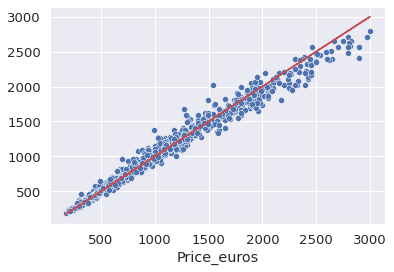

In [202]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [203]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

93.39387773871874

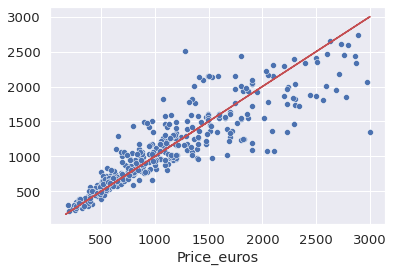

In [204]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [205]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

287.0745715090578

Text(0.5, 11.552000000000007, 'prediction error')

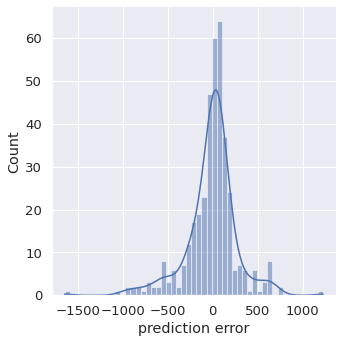

In [206]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [207]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

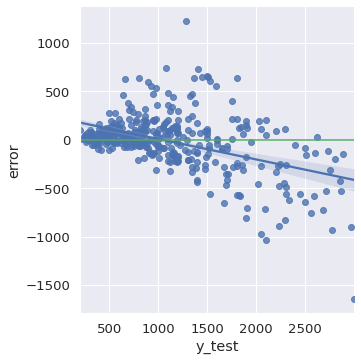

In [208]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'Relative Importance')

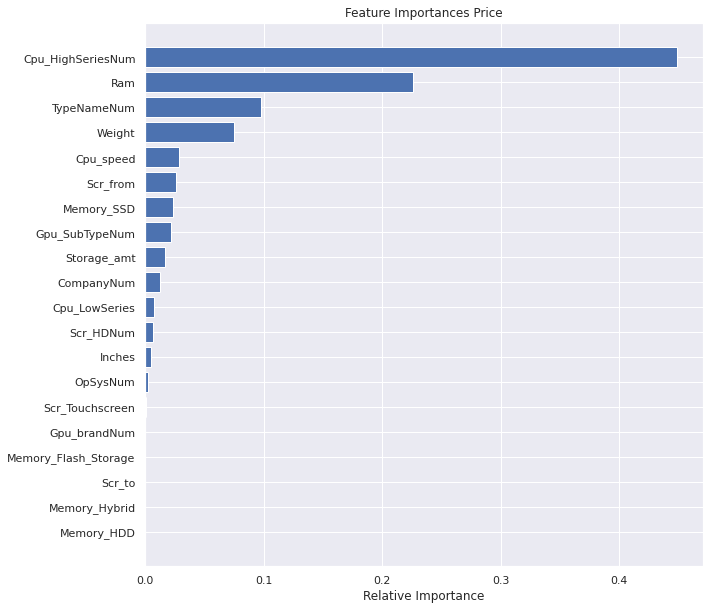

In [209]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [210]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,200,500,1000],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth" :[4,8,10,12,16,20],
            "min_samples_split" : [2,4,8,10,12],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [211]:
Grid_Search_CV_RFR(X_train,y_train)

(0.8277904357293634,
 {'bootstrap': False,
  'max_depth': 12,
  'max_features': 'log2',
  'min_samples_split': 2,
  'n_estimators': 1000})

In [248]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 400,max_depth=12,max_features='log2',min_samples_split=2,bootstrap=False, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [249]:
# Use the forest's predict method on the test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_test_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 181.1 degrees.


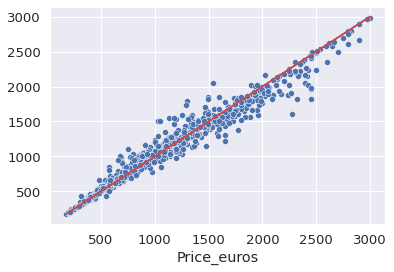

In [250]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [251]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

113.22078485681604

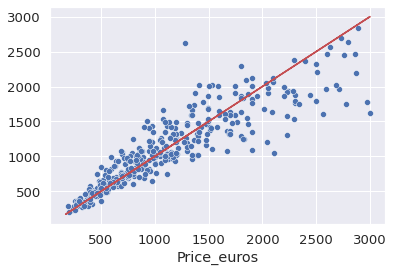

In [252]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [253]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

276.53153098431204

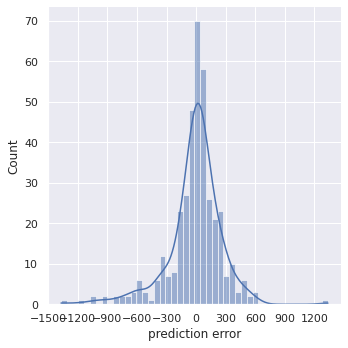

In [292]:

sns.set(rc={'figure.figsize':(15,13)})
sns.displot(y_test_pred - y_test, kde=True)
plt.xticks(list(range(-1500,1500,300)))
plt.xlabel('prediction error')
plt.show()

In [255]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

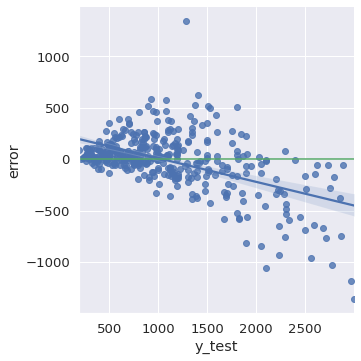

In [221]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'Relative Importance')

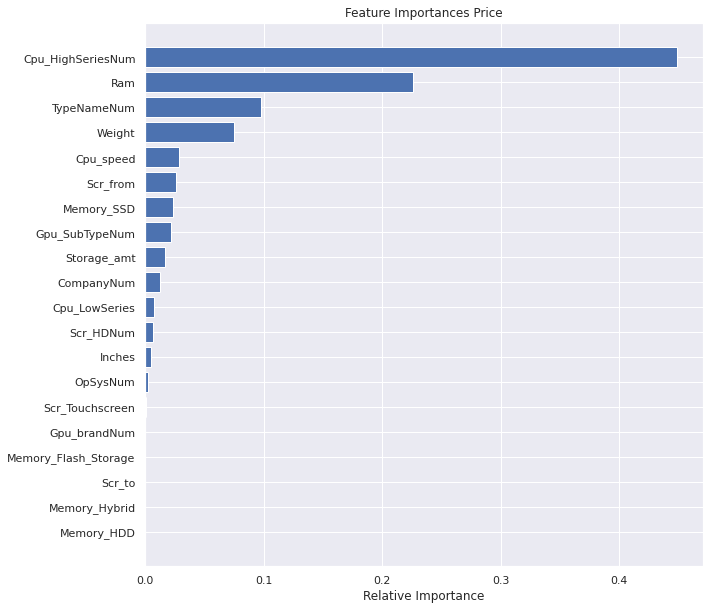

In [222]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

#end code of itay

In [ ]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

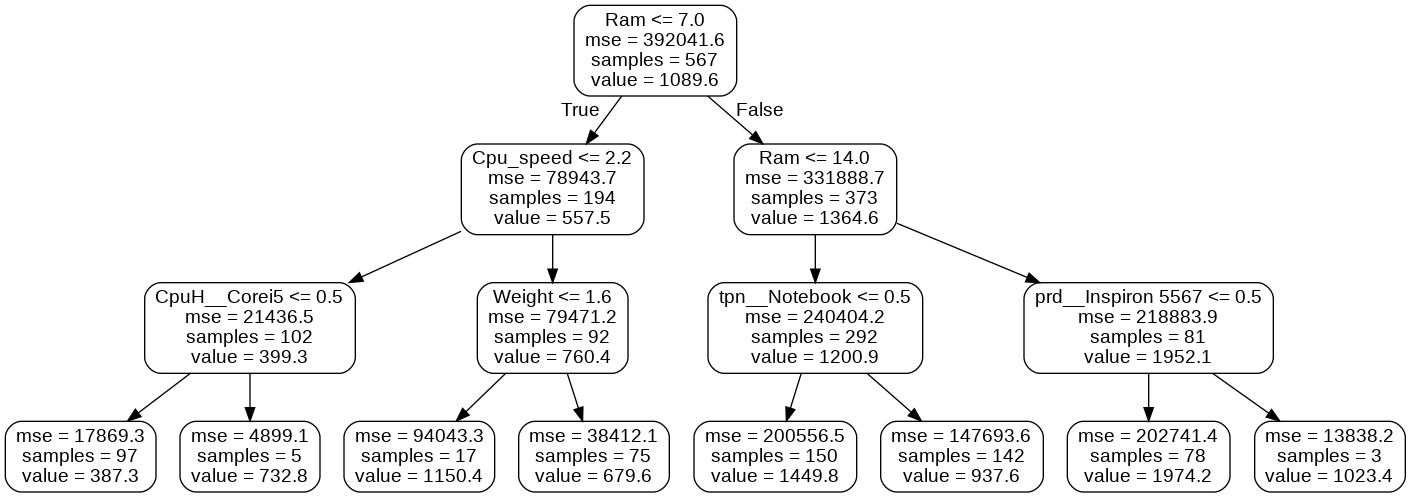

In [ ]:
### display small_tree.png
Image(filename='small_tree.png') 

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# if required to re-run the model

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Ram'), feature_list.index('Weight'), feature_list.index('tpn__Notebook')]
#train_important = X_train[:, important_indices]
#test_important = X_test[:, important_indices]
# Train the random forest
#rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
#predictions = rf_most_important.predict(test_important)
#errors = abs(predictions - test_labels)
# Display the performance metrics
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

TypeError: ignored

In [ ]:
importances.sort(reverse=True)

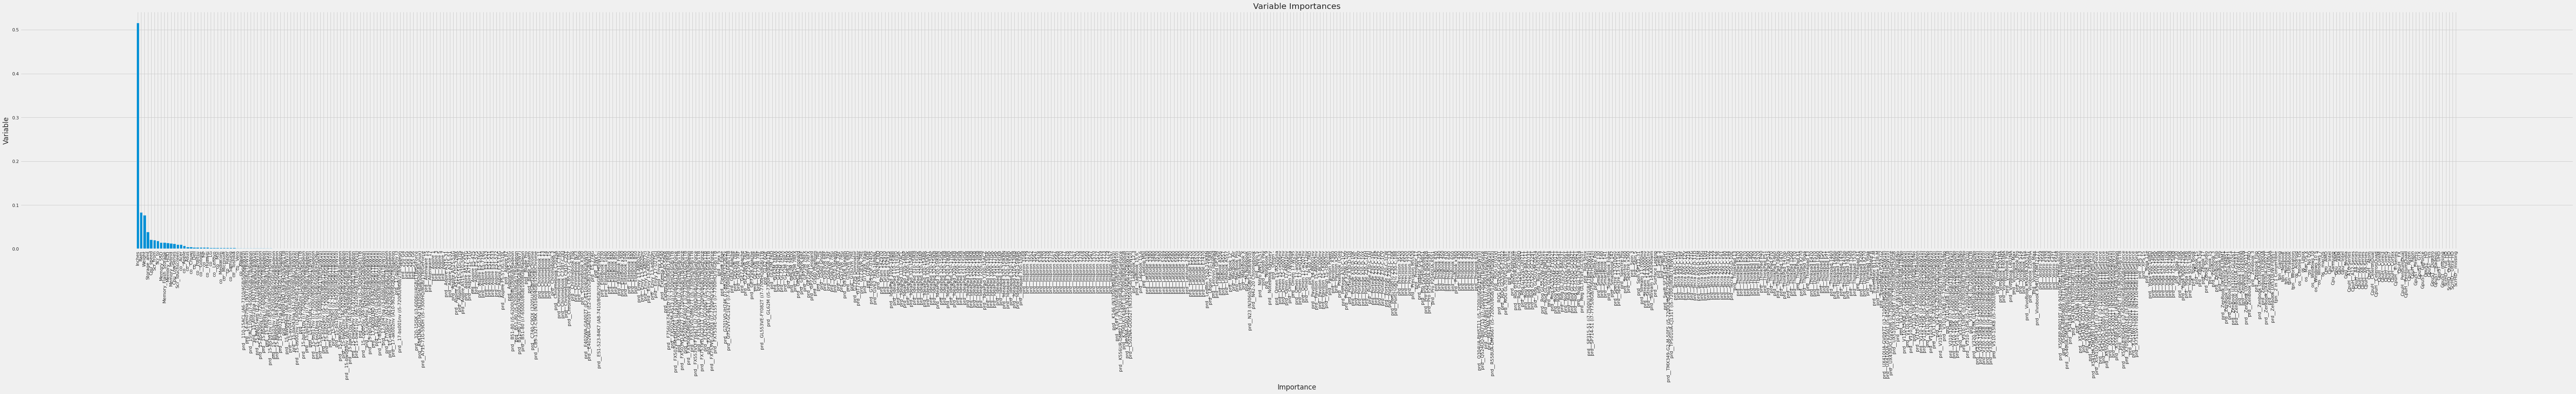

In [ ]:
plt.figure(figsize=(100,10))
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.xlabel('Importance'); plt.ylabel('Variable'); plt.title('Variable Importances');

# Linear Regression Model

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df_model.drop('Price_euros', axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [ ]:
#print(__doc__)

Automatically created module for IPython interactive environment


In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [ ]:
print(regr.intercept_)

-242.41816224976424


In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.23708540e+01  2.53788952e+01  3.72780135e+01  1.96898769e-01
  3.51467793e+01 -6.47932913e-02  5.38655105e-01  2.11622771e+02
  2.81333729e+02  3.15803208e+01 -1.10059940e+02 -2.59484086e-02
 -3.58023033e+01 -1.14425126e+02  2.59933553e+01 -1.19671914e+02
 -3.48025310e+02 -1.67919725e+02 -2.81414390e+02  8.56994191e+01
 -1.49589867e+02  2.58810970e+01  5.66349904e+02 -1.42670207e+02
  2.10270151e+02 -2.16412872e+02  2.28386433e+02  3.82966927e+02
  1.26942987e+02  2.37067574e+02 -3.43778133e+02 -5.65030323e+00
  4.77234607e-09 -6.00778642e+02 -3.60523619e+02 -6.29248151e+02
 -3.15128600e+01 -4.53369633e+02 -3.79951629e+02 -4.62075328e+02
 -4.23930495e+02 -3.43196617e+02  7.62759100e-09  8.21440693e-11
 -1.31964298e+02 -1.93205537e+01 -4.91164944e+02 -5.99961473e+01
 -3.20147424e+02 -3.89878674e+02 -2.63515074e+02 -4.07480039e+02
 -3.57785599e+02  2.76543233e-11 -2.37121935e+02 -2.79883523e+02
 -3.67088485e+02 -1.36151357e-09 -3.90798505e-10 -2.90026492e-09
 -1.02255

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 202.7335898401596
Root Mean Squared Error: 301.93258605964144


In [ ]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 91163.29


In [ ]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.77


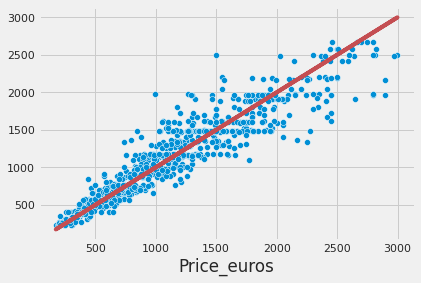

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

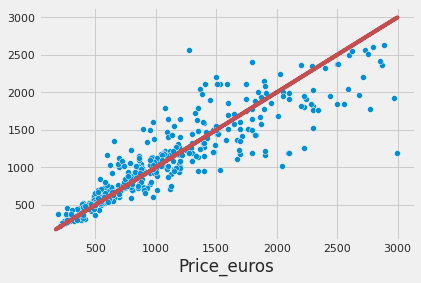

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

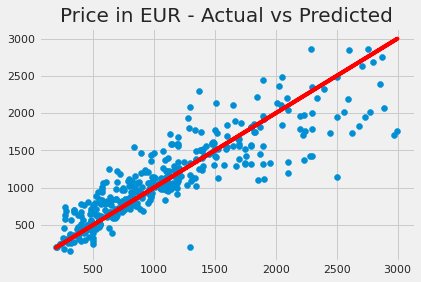

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_test,  c='red')
plt.title('Price in EUR - Actual vs Predicted', size=20)
plt.show()

Text(0.5, 11.120000000000005, 'prediction error (EUR)')

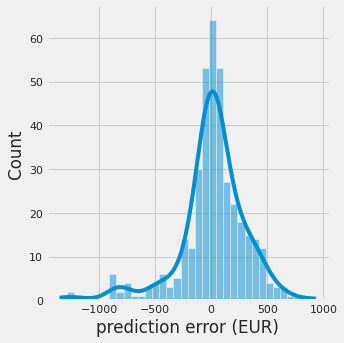

In [ ]:
sns.displot(y_pred - y_test, kde=True)
plt.xlabel('prediction error (EUR)')

# K Nearest Neighbors Model